# Test 22: F-test for K population means (analysis of variance)

## Objective

- To test the null hypothesis that K samples are from K populations with the same mean

## Assumptions

- The populations are normally distributed 
- The populations have equal variances 
- The samples are independent of each other

## Method

- Assume you have $K$ samples 
    - Let's denote each of these samples as $X_{i}$

- Each of these $K$ samples has sample size $n_1, n_2, ... n_k$
    - Let the total sample size be $N = n_1 + n_2 + ... n_k$

- As defined above, each of these $K$ samples has $n_k$ observations. So we can denote every observation as $x_{i,j}$ where $i$ denotes the index of the observation, and $j$ denotes the index of the sample
    - $j \in [1, K]$, and $i \in [1, n_j]$

- For each sample $X_j$, compute the sample mean $\bar{X_j}$

- For the entire population, compute the combined mean $\bar{X} = \frac{\sum X_j}{N}$

- We know define 2 statistics, known as the **between group variation** and **within group variation**
    - Between group variation, as the name suggests, measures the dispersion of each group's mean from the overall mean
    - Within group variation is simply the sample variance, i.e. dispersion of the values from its own mean

$$\begin{aligned}
    \text{Between Group Variation} &= \frac{\sum_{j=1}^K \bar{X_j} - \bar{X}}{K - 1} 
    \\ \\
    \text{Within Group Variation} &= \frac{\sum_{j=1}^K \sum_{i=1}^{n_j} (\bar{x_{i,j}} - \bar{X_j})^2}{N - K}
\end{aligned}$$

- Finally, the test statistic is defined as
$$\begin{aligned}
    F &= \frac{\text{Between Group Variation}}{\text{Within Group Variation}}
\end{aligned}$$

- $F$ follows an $F$ distribution with $(K-1, N-K)$ degrees of freedom

- What's the idea here?
    - Everything within the same group must be drawn from the same distribution, so taking the variance within each group gives you some sense of the base distribution's dispersal
    - If all samples are drawn from the same distribution (i.e. with the same mean), then the variation between groups must be similar to the variation within groups
    - Else, the variation will be quite different, and so we will reject the null hypothesis

## Proof that test statistic follows F distribution

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [81]:
N_POPULATIONS = np.random.randint(5,15)

MEANS = [np.random.randint(1, 16, size=1)[0]] * N_POPULATIONS
VARIANCE = [np.random.randint(1, 16, size=1)[0]] * N_POPULATIONS

# MEANS = [np.random.randint(1, 16, size=1)[0] for _ in range(N_POPULATIONS)]
# VARIANCE = [np.random.randint(1, 16, size=1)[0] for _ in range(N_POPULATIONS)]

SAMPLE_SIZES = np.random.randint(50,150, size=N_POPULATIONS)

def get_test_statistic_when_means_equal():
    samples = [np.random.normal(x, y, size=z) for x,y,z in zip(MEANS, VARIANCE, SAMPLE_SIZES)]
    total_counts = np.sum(SAMPLE_SIZES)
    sample_means = [np.mean(x) for x in samples]
    combined_mean = np.sum([np.sum(x) for x in samples]) / total_counts

    between_group_variation = (
        np.sum([
            (group_mean - combined_mean)**2 * n
            for n, group_mean in zip(SAMPLE_SIZES, sample_means)
        ]) / 
        (N_POPULATIONS - 1)
    )

    within_group_variation = (
        np.sum([
            np.sum((sample - sample_mean)**2)
            for sample, sample_mean in zip(samples, sample_means)
        ]) /
        (total_counts - N_POPULATIONS)
    )

    F = between_group_variation / within_group_variation
    return F

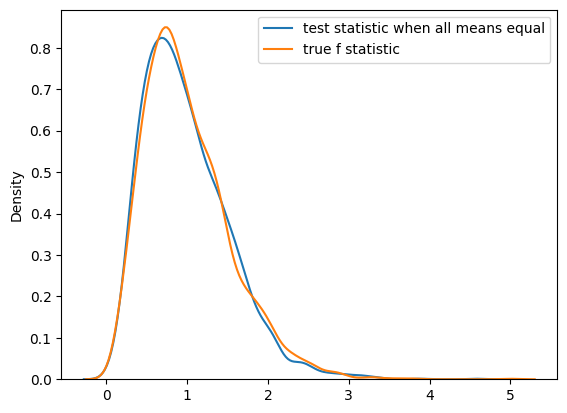

In [82]:
test_statistic_distribution_when_means_are_equal = [
    get_test_statistic_when_means_equal() for _ in range(3_000)
]
true_f_distribution = np.random.f(
    N_POPULATIONS-1, 
    np.sum(SAMPLE_SIZES) - N_POPULATIONS, 
    size=3_000
)

sns.kdeplot(test_statistic_distribution_when_means_are_equal, label='test statistic when all means equal')
sns.kdeplot(true_f_distribution, label='true f statistic')
plt.legend()